In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from utils import squeeze, make_spec_ds

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

data_dir = "./data/"

# Train-validation split
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset="both",
)

label_names = np.array(train_ds.class_names)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)

# Test-validation split
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)

# Testing dataset
test_spectrogram_ds = make_spec_ds(test_ds)

Found 64727 files belonging to 31 classes.
Using 51782 files for training.
Using 12945 files for validation.


# Model1

In [66]:
model1_dir = "./models/model_best_1.h5"
model1 = tf.keras.saving.load_model(model1_dir)

In [67]:
metrics = model1.evaluate(test_spectrogram_ds, return_dict=True)
loss = round((metrics["loss"]*100), 2)
acc = round((metrics["accuracy"]*100), 2)

102/102 [==============================] - 10s 78ms/step - loss: 0.3007 - accuracy: 0.9221


102/102 [==============================] - 8s 70ms/step


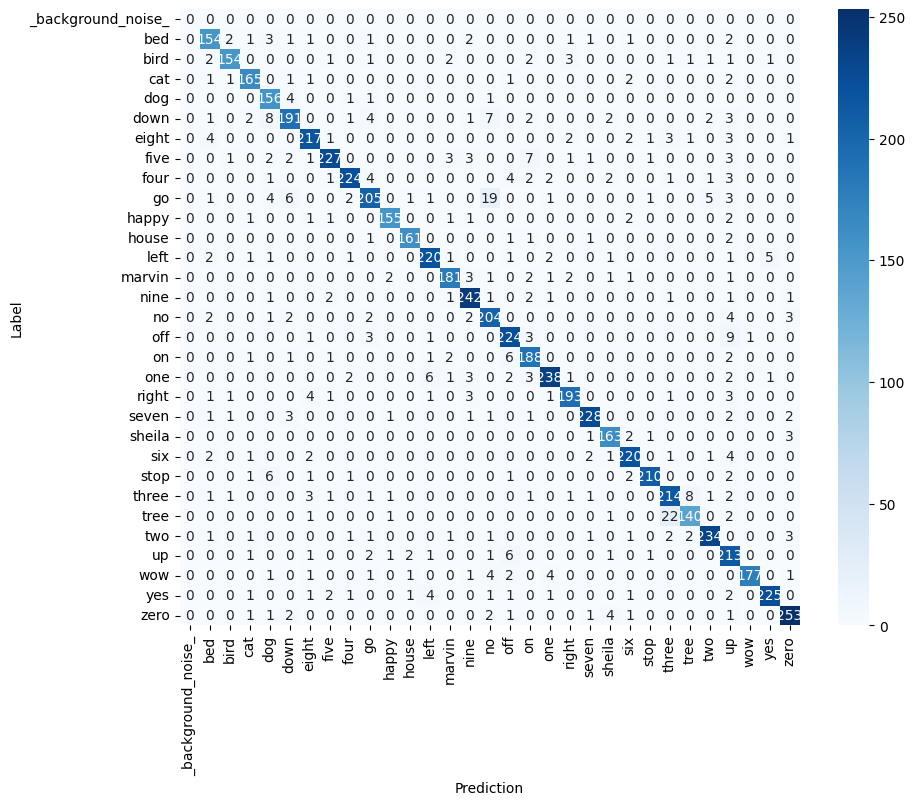

In [68]:
y_pred = model1.predict(test_spectrogram_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

cm = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [70]:
num_classes = cm.shape[0]
all_tp = 0
all_fp = 0
all_fn = 0
all_tn = 0

for i in range(num_classes):
    tp = cm[i, i]
    fp = tf.math.reduce_sum(cm[:, i]) - tp
    fn = tf.math.reduce_sum(cm[i, :]) - tp
    tn = tf.math.reduce_sum(cm) - (tp + fp + fn)

    all_tp += tp
    all_fp += fp
    all_fn += fn
    all_tn += tn

precision = all_tp / (all_tp + all_fp)
recall = all_tp / (all_tp + all_fn)
specificity = all_tn / (all_tn + all_fp)

precision = round((precision.numpy() * 100), 2)
recall = round((recall.numpy() * 100), 2)
specificity = round((specificity.numpy() * 100), 2)

print(f"Overall accuracy: {acc}%")
print(f"Overall precision: {precision}%")
print(f"Overall recall: {recall}%")
print(f"Overall specificity: {specificity}%")

print(f"Overall loss: {loss}%")

Overall accuracy: 92.21%
Overall precision: 92.21%
Overall recall: 92.21%
Overall specificity: 99.74%
Overall loss: 30.07%


# Model2

In [71]:
model2_dir = "./models/model_best_2.h5"
model2 = tf.keras.saving.load_model(model2_dir)

In [72]:
metrics = model2.evaluate(test_spectrogram_ds, return_dict=True)
loss = round((metrics["loss"]*100), 2)
acc = round((metrics["accuracy"]*100), 2)

102/102 [==============================] - 8s 65ms/step - loss: 0.3673 - accuracy: 0.9224


102/102 [==============================] - 8s 70ms/step


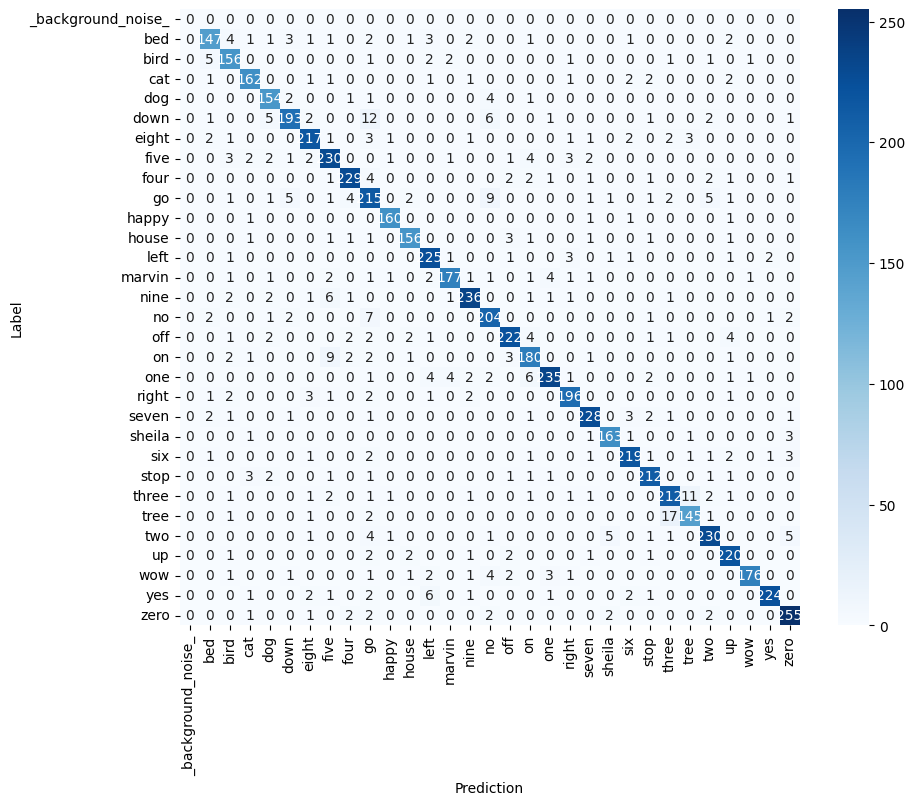

In [73]:
y_pred = model2.predict(test_spectrogram_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

cm = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [75]:
num_classes = cm.shape[0]
all_tp = 0
all_fp = 0
all_fn = 0
all_tn = 0

for i in range(num_classes):
    tp = cm[i, i]
    fp = tf.math.reduce_sum(cm[:, i]) - tp
    fn = tf.math.reduce_sum(cm[i, :]) - tp
    tn = tf.math.reduce_sum(cm) - (tp + fp + fn)

    all_tp += tp
    all_fp += fp
    all_fn += fn
    all_tn += tn

precision = all_tp / (all_tp + all_fp)
recall = all_tp / (all_tp + all_fn)
specificity = all_tn / (all_tn + all_fp)

precision = round((precision.numpy() * 100), 2)
recall = round((recall.numpy() * 100), 2)
specificity = round((specificity.numpy() * 100), 2)

print(f"Overall accuracy: {acc}%")
print(f"Overall precision: {precision}%")
print(f"Overall recall: {recall}%")
print(f"Overall specificity: {specificity}%")

print(f"Overall loss: {loss}%")

Overall accuracy: 92.24%
Overall precision: 92.24%
Overall recall: 92.24%
Overall specificity: 99.74%
Overall loss: 36.73%


# Model3

In [76]:
model3_dir = "./models/model_best_3.h5"
model3 = tf.keras.saving.load_model(model3_dir)

In [77]:
metrics = model3.evaluate(test_spectrogram_ds, return_dict=True)
loss = round((metrics["loss"]*100), 2)
acc = round((metrics["accuracy"]*100), 2)

102/102 [==============================] - 10s 82ms/step - loss: 0.3468 - accuracy: 0.9170


102/102 [==============================] - 8s 73ms/step


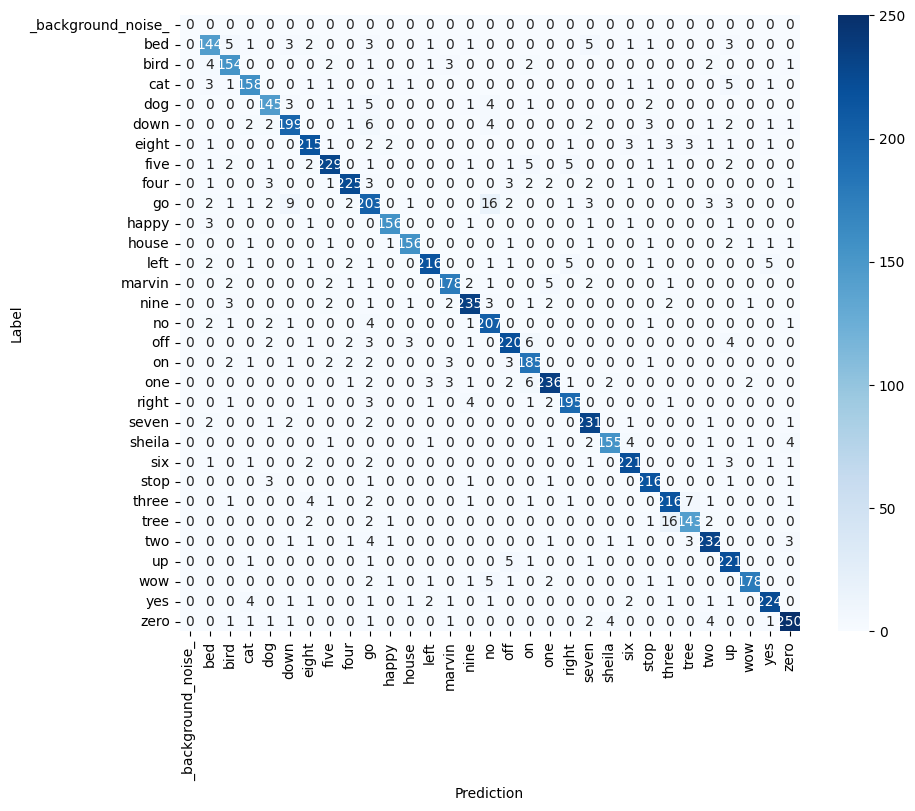

In [78]:
y_pred = model3.predict(test_spectrogram_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

cm = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [80]:
num_classes = cm.shape[0]
all_tp = 0
all_fp = 0
all_fn = 0
all_tn = 0

for i in range(num_classes):
    tp = cm[i, i]
    fp = tf.math.reduce_sum(cm[:, i]) - tp
    fn = tf.math.reduce_sum(cm[i, :]) - tp
    tn = tf.math.reduce_sum(cm) - (tp + fp + fn)

    all_tp += tp
    all_fp += fp
    all_fn += fn
    all_tn += tn

precision = all_tp / (all_tp + all_fp)
recall = all_tp / (all_tp + all_fn)
specificity = all_tn / (all_tn + all_fp)

precision = round((precision.numpy() * 100), 2)
recall = round((recall.numpy() * 100), 2)
specificity = round((specificity.numpy() * 100), 2)

print(f"Overall accuracy: {acc}%")
print(f"Overall precision: {precision}%")
print(f"Overall recall: {recall}%")
print(f"Overall specificity: {specificity}%")

print(f"Overall loss: {loss}%")

Overall accuracy: 91.7%
Overall precision: 91.7%
Overall recall: 91.7%
Overall specificity: 99.72%
Overall loss: 34.68%
